TSP stands for Traveling Salesman Problem, which is a well-known problem in computer science and operations research. The problem is defined as follows: given a list of cities and the distances between each pair of cities, find the shortest possible route that visits each city exactly once and returns to the starting city.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#احداثيات المدن
coordinates = [(0, 0), (1, 1), (2, 0), (4, 2), (5, 1), (3, 3), (2, 5), (1, 4), (0, 3), (4, 4)]
coordinates

[(0, 0),
 (1, 1),
 (2, 0),
 (4, 2),
 (5, 1),
 (3, 3),
 (2, 5),
 (1, 4),
 (0, 3),
 (4, 4)]

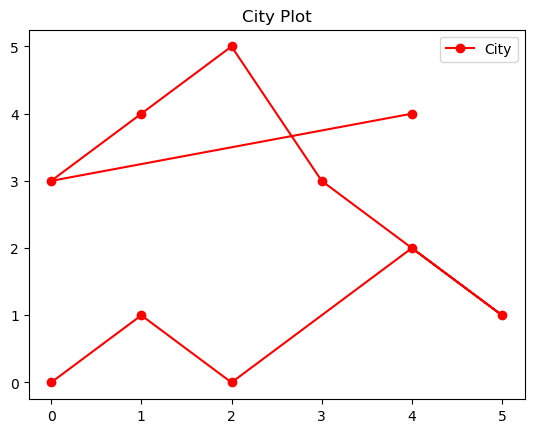

In [3]:
x_coords = [coord[0] for coord in coordinates]
y_coords = [coord[1] for coord in coordinates]
plt.plot(x_coords,y_coords,marker='o',c='r',label='City')
plt.title('City Plot')
plt.legend()

In [4]:
num_ants =10
num_iterations =200
alpha = 1
beta =1
evaporation_rate = 0.1
n=10# عدد المدن

In [5]:
#تقوم بحساب مصفوفة المسافات بين المدن المختلفة  
def calculate_distance_matrix(coordinates):
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            # Euclidean distance = sqrt((x1 - x2)**2 + (y1 - y2)**2), where (x1, y1)
            distance = np.sqrt((coordinates[i][0] - coordinates[j][0])**2 + (coordinates[i][1] - coordinates[j][1])**2)
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    return distance_matrix

In [6]:
distance_matrix = calculate_distance_matrix(coordinates)
distance_matrix

array([[0.        , 1.41421356, 2.        , 4.47213595, 5.09901951,
        4.24264069, 5.38516481, 4.12310563, 3.        , 5.65685425],
       [1.41421356, 0.        , 1.41421356, 3.16227766, 4.        ,
        2.82842712, 4.12310563, 3.        , 2.23606798, 4.24264069],
       [2.        , 1.41421356, 0.        , 2.82842712, 3.16227766,
        3.16227766, 5.        , 4.12310563, 3.60555128, 4.47213595],
       [4.47213595, 3.16227766, 2.82842712, 0.        , 1.41421356,
        1.41421356, 3.60555128, 3.60555128, 4.12310563, 2.        ],
       [5.09901951, 4.        , 3.16227766, 1.41421356, 0.        ,
        2.82842712, 5.        , 5.        , 5.38516481, 3.16227766],
       [4.24264069, 2.82842712, 3.16227766, 1.41421356, 2.82842712,
        0.        , 2.23606798, 2.23606798, 3.        , 1.41421356],
       [5.38516481, 4.12310563, 5.        , 3.60555128, 5.        ,
        2.23606798, 0.        , 1.41421356, 2.82842712, 2.23606798],
       [4.12310563, 3.        , 4.1231056

In [7]:
pheromone_matrix = np.ones((n, n))
pheromone_matrix

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [8]:
visibility =1/distance_matrix
visibility[visibility == np.inf ] = 0
visibility

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_11648\876292475.py:1: RuntimeWarning: divide by zero encountered in true_divide
  visibility =1/distance_matrix


array([[0.        , 0.70710678, 0.5       , 0.2236068 , 0.19611614,
        0.23570226, 0.18569534, 0.24253563, 0.33333333, 0.1767767 ],
       [0.70710678, 0.        , 0.70710678, 0.31622777, 0.25      ,
        0.35355339, 0.24253563, 0.33333333, 0.4472136 , 0.23570226],
       [0.5       , 0.70710678, 0.        , 0.35355339, 0.31622777,
        0.31622777, 0.2       , 0.24253563, 0.2773501 , 0.2236068 ],
       [0.2236068 , 0.31622777, 0.35355339, 0.        , 0.70710678,
        0.70710678, 0.2773501 , 0.2773501 , 0.24253563, 0.5       ],
       [0.19611614, 0.25      , 0.31622777, 0.70710678, 0.        ,
        0.35355339, 0.2       , 0.2       , 0.18569534, 0.31622777],
       [0.23570226, 0.35355339, 0.31622777, 0.70710678, 0.35355339,
        0.        , 0.4472136 , 0.4472136 , 0.33333333, 0.70710678],
       [0.18569534, 0.24253563, 0.2       , 0.2773501 , 0.2       ,
        0.4472136 , 0.        , 0.70710678, 0.35355339, 0.4472136 ],
       [0.24253563, 0.33333333, 0.2425356

In [9]:
distance_f=[]
for iteration in range(num_iterations):
    for ant in range(num_ants):
        #full path
        path = []
        #vist city
        visited = np.zeros(n, dtype=bool)
        #city random
        current_city = random.randint(0, n-1)
        #city true
        visited[current_city] = True
        temp_visibility = np.array(visibility)
        path.append(current_city)
        for i in range(n-1):
            combine_feature = np.zeros(n) 
            cum_prob = np.zeros(n) 
            temp_visibility[:,current_city] = 0   
            #print(temp_visibility)
            p_feature = np.power(pheromone_matrix[current_city,:],alpha)
            #print(f'p_feature is : {p_feature}')
            v_feature = np.power(temp_visibility[current_city,:],beta) 
            #print(f'v_feature is : {v_feature}')
            combine_feature = np.multiply(p_feature,v_feature)
            #print(f'combine_feature is : {combine_feature}')
            total = np.sum(combine_feature)
          #  print(f'total of combine_feature is : {total}')
            probs = combine_feature/total   
           # print(f'probability of elemen is : {probs}')
            #calculating cummulative sum
            cum_probs = np.cumsum(probs)
            #print(f'cum_prob is : {cum_probs}')
            # Choose the next city to visit based on the probabilities
            r = np.random.random()
            next_city = np.nonzero(cum_probs > r)[0][0]
            
            # Update the path and visited arrays
            visited[next_city] = True
            path.append(next_city)
            
            # Update the current city
            current_city = next_city
        
        # Update the pheromone matrix
        distance = 0
        for i in range(n-1):
            #مسافة قبلها مدينة بالاوللى 
            distance += distance_matrix[path[i]][path[i+1]]
        #مسافة اخر مدينة بالاوللى    
        distance += distance_matrix[path[-1]][path[0]]
        pheromone_matrix *= (1 - evaporation_rate)
        for i in range(n-1):
            pheromone_matrix[path[i], path[i+1]] += 1/distance
            pheromone_matrix[path[i+1], path[i]] += 1/distance
    # Print the best path and distance so far
    best_path = path
    best_distance = distance
    distance_f.append(distance)
    print(f"Iteration {iteration+1}: Best path = {best_path}, Best distance = {best_distance}")

Iteration 1: Best path = [0, 8, 6, 5, 9, 2, 1, 7, 4, 3], Best distance = 29.251407699364425
Iteration 2: Best path = [6, 2, 0, 8, 1, 4, 3, 5, 7, 9], Best distance = 26.53663105724556
Iteration 3: Best path = [5, 3, 4, 1, 2, 8, 0, 9, 7, 6], Best distance = 27.15532775194854
Iteration 4: Best path = [5, 9, 3, 4, 2, 0, 1, 6, 7, 8], Best distance = 21.35645109765152
Iteration 5: Best path = [3, 4, 0, 2, 1, 8, 6, 5, 7, 9], Best distance = 24.464077695584532
Iteration 6: Best path = [8, 6, 7, 9, 2, 4, 0, 1, 3, 5], Best distance = 28.966778600794598
Iteration 7: Best path = [0, 3, 5, 6, 7, 1, 8, 9, 2, 4], Best distance = 31.629237789123756
Iteration 8: Best path = [7, 8, 1, 2, 0, 4, 3, 5, 6, 9], Best distance = 22.464077695584535
Iteration 9: Best path = [8, 7, 5, 3, 4, 2, 1, 0, 9, 6], Best distance = 23.190762801272008
Iteration 10: Best path = [0, 1, 2, 9, 5, 6, 7, 8, 4, 3], Best distance = 25.050786068872025
Iteration 11: Best path = [3, 5, 9, 4, 2, 0, 1, 8, 7, 6], Best distance = 21.23724

Iteration 176: Best path = [0, 1, 2, 4, 3, 5, 9, 6, 7, 8], Best distance = 18.29784057427984
Iteration 177: Best path = [3, 4, 2, 1, 0, 8, 7, 6, 9, 5], Best distance = 18.29784057427984
Iteration 178: Best path = [2, 1, 0, 8, 7, 6, 9, 5, 3, 4], Best distance = 18.297840574279835
Iteration 179: Best path = [4, 2, 1, 0, 8, 7, 6, 9, 5, 3], Best distance = 18.29784057427984
Iteration 180: Best path = [2, 1, 0, 8, 7, 6, 9, 5, 3, 4], Best distance = 18.297840574279835
Iteration 181: Best path = [0, 1, 2, 4, 3, 5, 9, 6, 7, 8], Best distance = 18.29784057427984
Iteration 182: Best path = [9, 6, 7, 8, 0, 1, 2, 4, 3, 5], Best distance = 18.29784057427984
Iteration 183: Best path = [3, 5, 9, 6, 7, 8, 0, 1, 2, 4], Best distance = 18.297840574279835
Iteration 184: Best path = [1, 0, 8, 7, 6, 9, 5, 3, 4, 2], Best distance = 18.297840574279835
Iteration 185: Best path = [6, 7, 8, 0, 1, 2, 4, 3, 5, 9], Best distance = 18.297840574279835
Iteration 186: Best path = [1, 0, 8, 7, 6, 9, 5, 3, 4, 2], Best d

In [10]:
best_path

[5, 9, 6, 7, 8, 0, 1, 2, 4, 3]

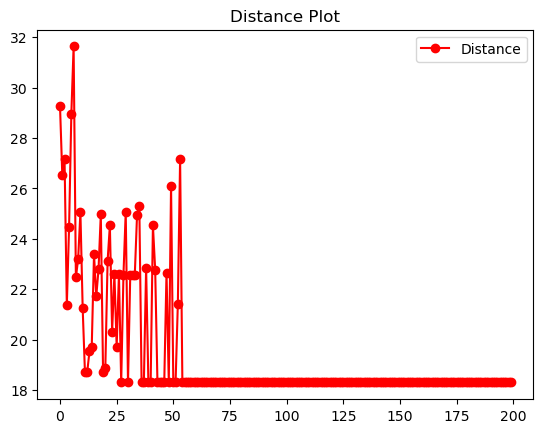

In [11]:
plt.plot(distance_f,c='r',marker='o',label='Distance')
plt.title('Distance Plot')
plt.legend()